### sources
* df1: [environment data](https://data.humdata.org/dataset/world-bank-environment-indicators-for-egypt-arab-rep)

*  df2: [agriculture-and-rural-development data](https://data.humdata.org/dataset/world-bank-agriculture-and-rural-development-indicators-for-egypt-arab-rep)

* df3: [climate-change data](https://data.humdata.org/dataset/world-bank-climate-change-indicators-for-egypt-arab-rep)

* df4: [rain data](https://climateknowledgeportal.worldbank.org/download-data)

## * Table of contents:



In [396]:
import pandas as pd 
import re

### 1- environment data

In [397]:
df1=pd.read_csv('environment_egy.csv')
df1.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,"Egypt, Arab Rep.",EGY,2018,Agricultural land (% of land area),AG.LND.AGRI.ZS,3.85350223517002
2,"Egypt, Arab Rep.",EGY,2017,Agricultural land (% of land area),AG.LND.AGRI.ZS,3.85350223517002
3,"Egypt, Arab Rep.",EGY,2016,Agricultural land (% of land area),AG.LND.AGRI.ZS,3.75083168416294
4,"Egypt, Arab Rep.",EGY,2015,Agricultural land (% of land area),AG.LND.AGRI.ZS,3.80719985936009


In [398]:
df1['Indicator Name'].value_counts().nlargest(50)

CO2 emissions (kg per 2010 US$ of GDP)                                                       59
CO2 emissions (kt)                                                                           59
Capture fisheries production (metric tons)                                                   59
CO2 emissions (metric tons per capita)                                                       59
Total fisheries production (metric tons)                                                     59
Aquaculture production (metric tons)                                                         59
Surface area (sq. km)                                                                        58
Agricultural land (% of land area)                                                           58
Arable land (% of land area)                                                                 58
Land area (sq. km)                                                                           58
CO2 emissions from solid fuel consumptio

In [399]:
df1[df1['Indicator Name'].str.contains(r'\brural\b.*')]['Indicator Name'].value_counts()

People using at least basic drinking water services, rural (% of rural population)                  18
People with basic handwashing facilities including soap and water, rural (% of rural population)    18
People practicing open defecation, rural (% of rural population)                                    18
People using at least basic sanitation services, rural (% of rural population)                      18
Name: Indicator Name, dtype: int64

In [400]:
# extract water records
water_df1=df1[(df1['Indicator Name'].str.contains(r'\withdrawal\b.*'))|(df1['Indicator Name'].str.contains(r'\water\b.*'))]

In [401]:
water_df1.head(2)

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
1919,"Egypt, Arab Rep.",EGY,2017,"Water productivity, total (constant 2010 US$ G...",ER.GDP.FWTL.M3.KD,4.23408126030188
1920,"Egypt, Arab Rep.",EGY,2012,"Water productivity, total (constant 2010 US$ G...",ER.GDP.FWTL.M3.KD,3.57627672628083


In [402]:
water_df1.shape

(176, 6)

In [403]:
water_df1['Indicator Name'].value_counts()

People using at least basic drinking water services (% of population)                                        18
People with basic handwashing facilities including soap and water, rural (% of rural population)             18
People with basic handwashing facilities including soap and water, urban (% of urban population)             18
People with basic handwashing facilities including soap and water (% of population)                          18
People using at least basic drinking water services, urban (% of urban population)                           18
People using at least basic drinking water services, rural (% of rural population)                           18
Renewable internal freshwater resources per capita (cubic meters)                                            12
Renewable internal freshwater resources, total (billion cubic meters)                                        12
Annual freshwater withdrawals, total (billion cubic meters)                                             

In [404]:
water_df1['Indicator Name'].str.extract(r'^(Annual)').shape

(176, 1)

In [405]:
#extract [annual freshwater withdrawals and water productivity]
water_df=df1[df1['Indicator Name'].str.contains(r'^(Annual)|(Water)')]     
water_df.head(3)

C:\Users\-TOSHIBA-\Anaconda3\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
1919,"Egypt, Arab Rep.",EGY,2017,"Water productivity, total (constant 2010 US$ G...",ER.GDP.FWTL.M3.KD,4.23408126030188
1920,"Egypt, Arab Rep.",EGY,2012,"Water productivity, total (constant 2010 US$ G...",ER.GDP.FWTL.M3.KD,3.57627672628083
1921,"Egypt, Arab Rep.",EGY,2007,"Water productivity, total (constant 2010 US$ G...",ER.GDP.FWTL.M3.KD,2.52184859188206


In [406]:
water_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 1919 to 1960
Data columns (total 6 columns):
Country Name      42 non-null object
Country ISO3      42 non-null object
Year              42 non-null object
Indicator Name    42 non-null object
Indicator Code    42 non-null object
Value             42 non-null object
dtypes: object(6)
memory usage: 2.3+ KB


In [407]:
water_df['units']=water_df['Indicator Name'].apply(lambda x:re.split(',',x)[1])

C:\Users\-TOSHIBA-\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [408]:
water_df['Indicator Name']=water_df['Indicator Name'].apply(lambda x:re.split(',',x)[0])

C:\Users\-TOSHIBA-\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [409]:
water_df.head(1)

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value,units
1919,"Egypt, Arab Rep.",EGY,2017,Water productivity,ER.GDP.FWTL.M3.KD,4.23408126030188,total (constant 2010 US$ GDP per cubic meter ...


In [410]:
water_df.units.value_counts()

 total (billion cubic meters)                                                    9
 total (% of internal resources)                                                 9
 total (constant 2010 US$ GDP per cubic meter of total freshwater withdrawal)    9
 agriculture (% of total freshwater withdrawal)                                  5
 domestic (% of total freshwater withdrawal)                                     5
 industry (% of total freshwater withdrawal)                                     5
Name: units, dtype: int64

#### Here I'm extracting different water data to avoid duplicate values in year column, and I can join them by a key(Year).

In [411]:
water_df['Year'].min(),water_df['Year'].max()

('1977', '2017')

In [412]:
agriculture_withdrawals=water_df[water_df.units==' agriculture (% of total freshwater withdrawal)']

In [413]:
annual_withdrawals=water_df[water_df.units==' total (billion cubic meters)']

In [414]:
domestic_withdrawals=water_df[water_df.units==' domestic (% of total freshwater withdrawal)']

In [415]:
industry_withdrawals=water_df[water_df.units==' industry (% of total freshwater withdrawal)']

In [416]:
water_productivity=water_df[water_df['Indicator Name']=='Water productivity']

In [417]:
dfs=[agriculture_withdrawals,annual_withdrawals,domestic_withdrawals,industry_withdrawals,water_productivity]
for df in dfs:
    display(df.head(2))
    print('-'*50)

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value,units
1928,"Egypt, Arab Rep.",EGY,2017,Annual freshwater withdrawals,ER.H2O.FWAG.ZS,79.16129032,agriculture (% of total freshwater withdrawal)
1929,"Egypt, Arab Rep.",EGY,2012,Annual freshwater withdrawals,ER.H2O.FWAG.ZS,85.06224066,agriculture (% of total freshwater withdrawal)


--------------------------------------------------


,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value,units
1943,"Egypt, Arab Rep.",EGY,2017,Annual freshwater withdrawals,ER.H2O.FWTL.K3,64.2,total (billion cubic meters)
1944,"Egypt, Arab Rep.",EGY,2012,Annual freshwater withdrawals,ER.H2O.FWTL.K3,63.7,total (billion cubic meters)


--------------------------------------------------


,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value,units
1933,"Egypt, Arab Rep.",EGY,2017,Annual freshwater withdrawals,ER.H2O.FWDM.ZS,13.8709677419,domestic (% of total freshwater withdrawal)
1934,"Egypt, Arab Rep.",EGY,2012,Annual freshwater withdrawals,ER.H2O.FWDM.ZS,13.2780082988,domestic (% of total freshwater withdrawal)


--------------------------------------------------


,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value,units
1938,"Egypt, Arab Rep.",EGY,2017,Annual freshwater withdrawals,ER.H2O.FWIN.ZS,6.9677419355,industry (% of total freshwater withdrawal)
1939,"Egypt, Arab Rep.",EGY,2012,Annual freshwater withdrawals,ER.H2O.FWIN.ZS,1.6597510373,industry (% of total freshwater withdrawal)


--------------------------------------------------


,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value,units
1919,"Egypt, Arab Rep.",EGY,2017,Water productivity,ER.GDP.FWTL.M3.KD,4.23408126030188,total (constant 2010 US$ GDP per cubic meter ...
1920,"Egypt, Arab Rep.",EGY,2012,Water productivity,ER.GDP.FWTL.M3.KD,3.57627672628083,total (constant 2010 US$ GDP per cubic meter ...


--------------------------------------------------


#### convert row in indicator name to feature(column) by pivot tables

In [418]:
def convert_row_to_col(df):

    indicator_name=df['Indicator Name'].values[0]+df['units'].values[0]
    pivot= df.pivot(index='Year',columns="Indicator Name", values=["Value",'units'])
    pivot=pivot.droplevel('Indicator Name',axis=1)
    pivot.rename(columns={'Value':indicator_name},inplace=True)
    return pivot

In [419]:
annual_withdrawals,agriculture_withdrawals,domestic_withdrawals,industry_withdrawals,water_productivity=\
convert_row_to_col(annual_withdrawals),convert_row_to_col(agriculture_withdrawals),convert_row_to_col(domestic_withdrawals),\
convert_row_to_col(industry_withdrawals),convert_row_to_col(water_productivity)

In [420]:
annual_withdrawals

,Annual freshwater withdrawals total (billion cubic meters),units
Year,,
1977,48.9666666667,total (billion cubic meters)
1982,50.8833333333,total (billion cubic meters)
1987,52.8,total (billion cubic meters)
1992,54.6916666667,total (billion cubic meters)
1997,62.0929428571,total (billion cubic meters)
2002,69.31,total (billion cubic meters)
2007,73.6275,total (billion cubic meters)
2012,63.7,total (billion cubic meters)
2017,64.2,total (billion cubic meters)


In [421]:
agriculture_withdrawals

,Annual freshwater withdrawals agriculture (% of total freshwater withdrawal),units
Year,,
1997,86.24730208,agriculture (% of total freshwater withdrawal)
2002,86.27562642,agriculture (% of total freshwater withdrawal)
2007,86.03009722,agriculture (% of total freshwater withdrawal)
2012,85.06224066,agriculture (% of total freshwater withdrawal)
2017,79.16129032,agriculture (% of total freshwater withdrawal)


In [422]:
water_productivity

,Water productivity total (constant 2010 US$ GDP per cubic meter of total freshwater withdrawal),units
Year,,
1977,0.780681379018839,total (constant 2010 US$ GDP per cubic meter ...
1982,1.10743371187555,total (constant 2010 US$ GDP per cubic meter ...
1987,1.41626080348012,total (constant 2010 US$ GDP per cubic meter ...
1992,1.68894043139828,total (constant 2010 US$ GDP per cubic meter ...
1997,1.84461128232566,total (constant 2010 US$ GDP per cubic meter ...
2002,2.08643531417038,total (constant 2010 US$ GDP per cubic meter ...
2007,2.52184859188206,total (constant 2010 US$ GDP per cubic meter ...
2012,3.57627672628083,total (constant 2010 US$ GDP per cubic meter ...
2017,4.23408126030188,total (constant 2010 US$ GDP per cubic meter ...


In [423]:
industry_withdrawals

,Annual freshwater withdrawals industry (% of total freshwater withdrawal),units
Year,,
1997,6.79652878,industry (% of total freshwater withdrawal)
2002,5.125284738,industry (% of total freshwater withdrawal)
2007,3.4625116527,industry (% of total freshwater withdrawal)
2012,1.6597510373,industry (% of total freshwater withdrawal)
2017,6.9677419355,industry (% of total freshwater withdrawal)


In [424]:
domestic_withdrawals

,Annual freshwater withdrawals domestic (% of total freshwater withdrawal),units
Year,,
1997,6.9561691422,domestic (% of total freshwater withdrawal)
2002,8.5990888383,domestic (% of total freshwater withdrawal)
2007,10.5073911306,domestic (% of total freshwater withdrawal)
2012,13.2780082988,domestic (% of total freshwater withdrawal)
2017,13.8709677419,domestic (% of total freshwater withdrawal)


In [425]:
dfs=[annual_withdrawals,agriculture_withdrawals,
     domestic_withdrawals,industry_withdrawals,water_productivity]
for df in dfs:
    df.drop('units',inplace=True,axis=1)

#### join all the data by index(year)

In [426]:
freshwater_withdrawals_data=annual_withdrawals.join(
    [agriculture_withdrawals,domestic_withdrawals,industry_withdrawals,water_productivity])
freshwater_withdrawals_data.head(2)

,Annual freshwater withdrawals total (billion cubic meters),Annual freshwater withdrawals agriculture (% of total freshwater withdrawal),Annual freshwater withdrawals domestic (% of total freshwater withdrawal),Annual freshwater withdrawals industry (% of total freshwater withdrawal),Water productivity total (constant 2010 US$ GDP per cubic meter of total freshwater withdrawal)
Year,,,,,
1977,48.9666666667,NaN,NaN,NaN,0.780681379018839
1982,50.8833333333,NaN,NaN,NaN,1.10743371187555


In [427]:
freshwater_withdrawals_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 1977 to 2017
Data columns (total 5 columns):
Annual freshwater withdrawals total (billion cubic meters)                                         9 non-null object
Annual freshwater withdrawals agriculture (% of total freshwater withdrawal)                       5 non-null object
Annual freshwater withdrawals domestic (% of total freshwater withdrawal)                          5 non-null object
Annual freshwater withdrawals industry (% of total freshwater withdrawal)                          5 non-null object
Water productivity total (constant 2010 US$ GDP per cubic meter of total freshwater withdrawal)    9 non-null object
dtypes: object(5)
memory usage: 752.0+ bytes


### 2- agriculture-and-rural-development

In [428]:
df2=pd.read_csv('agriculture-and-rural-development_egy.csv')
df2.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,"Egypt, Arab Rep.",EGY,2008,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,103188
2,"Egypt, Arab Rep.",EGY,2007,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,102584
3,"Egypt, Arab Rep.",EGY,2006,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,100317
4,"Egypt, Arab Rep.",EGY,2005,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,98051


In [429]:
df2['Indicator Name'].value_counts().nlargest(50)

Rural population (% of total population)                                                      61
Agriculture, forestry, and fishing, value added (% of GDP)                                    61
Rural population                                                                              61
Rural population growth (annual %)                                                            60
Cereal yield (kg per hectare)                                                                 58
Agricultural land (% of land area)                                                            58
Crop production index (2014-2016 = 100)                                                       58
Land area (sq. km)                                                                            58
Agricultural land (sq. km)                                                                    58
Food production index (2014-2016 = 100)                                                       58
Arable land (hectares per pers

In [430]:
#Agricultural land
agricultural_df=df2[df2['Indicator Name']=='Agricultural land (sq. km)']

agricultural_df['units']=agricultural_df['Indicator Name'].apply(lambda x: re.split('(\(.*)',x)[1])

agricultural_df['Indicator Name']=agricultural_df['Indicator Name'].apply(lambda x: re.split('(\(.*)',x)[0])

agricultural_df.head(3)

C:\Users\-TOSHIBA-\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\-TOSHIBA-\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value,units
165,"Egypt, Arab Rep.",EGY,2018,Agricultural land,AG.LND.AGRI.K2,38359.688,(sq. km)
166,"Egypt, Arab Rep.",EGY,2017,Agricultural land,AG.LND.AGRI.K2,38359.688,(sq. km)
167,"Egypt, Arab Rep.",EGY,2016,Agricultural land,AG.LND.AGRI.K2,37337.654,(sq. km)


In [431]:
agricultural_df.shape

(58, 7)

In [432]:
agricultural_df['Year'].min(),agricultural_df['Year'].max()

('1961', '2018')

In [433]:
#rural population by million
df2[df2['Indicator Name']=='Rural population']

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
1522,"Egypt, Arab Rep.",EGY,2020,Rural population,SP.RUR.TOTL,58552675
1523,"Egypt, Arab Rep.",EGY,2019,Rural population,SP.RUR.TOTL,57492251
1524,"Egypt, Arab Rep.",EGY,2018,Rural population,SP.RUR.TOTL,56392787
1525,"Egypt, Arab Rep.",EGY,2017,Rural population,SP.RUR.TOTL,55256782
1526,"Egypt, Arab Rep.",EGY,2016,Rural population,SP.RUR.TOTL,54087949
...,...,...,...,...,...,...
1578,"Egypt, Arab Rep.",EGY,1964,Rural population,SP.RUR.TOTL,17985249
1579,"Egypt, Arab Rep.",EGY,1963,Rural population,SP.RUR.TOTL,17618184
1580,"Egypt, Arab Rep.",EGY,1962,Rural population,SP.RUR.TOTL,17254179
1581,"Egypt, Arab Rep.",EGY,1961,Rural population,SP.RUR.TOTL,16892632


In [434]:
rural_population_bymillion=df2[df2['Indicator Name']=='Rural population']

In [435]:
rural_population_bymillion.head(2)

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
1522,"Egypt, Arab Rep.",EGY,2020,Rural population,SP.RUR.TOTL,58552675
1523,"Egypt, Arab Rep.",EGY,2019,Rural population,SP.RUR.TOTL,57492251


### 3-climate-change

In [436]:
df3=pd.read_csv('climate-change_egy.csv')
df3.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,"Egypt, Arab Rep.",EGY,2018,Agricultural land (sq. km),AG.LND.AGRI.K2,38359.688
2,"Egypt, Arab Rep.",EGY,2017,Agricultural land (sq. km),AG.LND.AGRI.K2,38359.688
3,"Egypt, Arab Rep.",EGY,2016,Agricultural land (sq. km),AG.LND.AGRI.K2,37337.654
4,"Egypt, Arab Rep.",EGY,2015,Agricultural land (sq. km),AG.LND.AGRI.K2,37898.771


In [437]:
df3['Indicator Name'].value_counts().nlargest(50)

Urban population                                                                             61
Urban population (% of total population)                                                     61
Population in urban agglomerations of more than 1 million (% of total population)            61
Population, total                                                                            61
Agriculture, forestry, and fishing, value added (% of GDP)                                   61
Urban population growth (annual %)                                                           60
Population growth (annual %)                                                                 60
Mortality rate, under-5 (per 1,000 live births)                                              60
CO2 emissions (kt)                                                                           59
CO2 emissions (metric tons per capita)                                                       59
CO2 emissions (kg per 2010 US$ of GDP)  

In [438]:
urban_population=df3[df3['Indicator Name']=='Urban population']

In [439]:
urban_population.head(2)

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
1832,"Egypt, Arab Rep.",EGY,2020,Urban population,SP.URB.TOTL,43781728
1833,"Egypt, Arab Rep.",EGY,2019,Urban population,SP.URB.TOTL,42895825


In [440]:
total_population=df3[df3['Indicator Name']=='Population, total']

In [441]:
total_population.head(2)

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
1711,"Egypt, Arab Rep.",EGY,2020,"Population, total",SP.POP.TOTL,102334403
1712,"Egypt, Arab Rep.",EGY,2019,"Population, total",SP.POP.TOTL,100388076


#### Here I'm going to extract climate change features to merge them with the other data to figure out its impact on freshwater withdrawals and agriculture.

In [442]:
# CO2 emissions (kt)
co2_data=df3[df3["Indicator Name"]=='CO2 emissions (kt)'] 

In [443]:
arable_land_data=df3[df3["Indicator Name"]=='Arable land (% of land area)'] 

In [444]:
# Cereal yield (kg per hectare) 
cereal_yield_data=df3[df3["Indicator Name"]=='Cereal yield (kg per hectare)'] 

In [445]:
methane_data=df3[df3["Indicator Name"]=='Methane emissions (kt of CO2 equivalent)'] 
nitrous_data=df3[df3["Indicator Name"]=='Nitrous oxide emissions (thousand metric tons of CO2 equivalent)'] 

#### repeat the previous process convert row to feature by pivot table.

In [452]:
def convert_row_to_col_2(df):

    indicator_name=df['Indicator Name'].values[0]
    pivot= df.pivot(index='Year',columns="Indicator Name", values="Value") .rename_axis(columns=None)
#     (total_population.pivot(index='Year',columns="Indicator Name", values="Value")
#          .rename_axis(columns=None)
#          )
#     pivot=pivot.droplevel('Indicator Name',axis=1)
#     pivot.rename(columns={'Value':indicator_name},inplace=True)
    return pivot

In [454]:
total_population,urban_population,rural_population_bymillion,co2_data,arable_land_data,cereal_yield_data,methane_data,nitrous_data=\
convert_row_to_col_2(total_population),convert_row_to_col_2(urban_population),convert_row_to_col_2(rural_population_bymillion),\
convert_row_to_col_2(co2_data),convert_row_to_col_2(arable_land_data),convert_row_to_col_2(cereal_yield_data),\
convert_row_to_col_2(methane_data),convert_row_to_col_2(nitrous_data)

In [455]:
total_population

,"Population, total"
Year,
1960,26632891
1961,27366239
1962,28112258
1963,28871383
1964,29644875
...,...
2016,94447071
2017,96442590
2018,98423602


In [458]:
# dfs=[total_population,rural_population_bymillion,urban_population,agricultural_df,]
# for df in dfs:
#     df['Year']=df['Year'].astype(int)

In [459]:
# total_population['Year'].dtype

In [457]:
populaion_data=total_population.join([urban_population,rural_population_bymillion])
populaion_data.head(2)

,"Population, total",Urban population,Rural population
Year,,,
1960,26632891,10084278,16548613
1961,27366239,10473607,16892632


In [460]:
climate_change_data=co2_data.join([methane_data,cereal_yield_data,arable_land_data,nitrous_data])
climate_change_data.head()

,CO2 emissions (kt),Methane emissions (kt of CO2 equivalent),Cereal yield (kg per hectare),Arable land (% of land area),Nitrous oxide emissions (thousand metric tons of CO2 equivalent)
Year,,,,,
1960,16054.126,NaN,NaN,NaN,NaN
1961,17088.22,NaN,2905.7,2.51042242202019,NaN
1962,18595.357,NaN,3259.6,2.44412074940981,NaN
1963,21554.626,NaN,3312.8,2.42402933346728,NaN
1964,25522.32,NaN,3330.1,2.43307047064142,NaN


In [461]:
# agricultural_df
agricultural_df=convert_row_to_col(agricultural_df)

In [463]:
agricultural_df.drop('units',inplace=True,axis=1)

In [465]:
agricultural_df.head()

,Agricultural land (sq. km)
Year,
1961,25680
1962,25050
1963,24900
1964,25060
1965,26720


### 4-rain data

In [466]:
rain_df=pd.read_csv('rain-temp.csv')
rain_df.head()

,Year,Country,Statistics,Rainfall(MM),Temperature(C),MinTemp(C),MaxTemp(C)
0,1991,Egypt,Jan Average,6.1,13.1,6.0,20.1
1,1991,Egypt,Feb Average,4.2,15.2,7.6,22.9
2,1991,Egypt,Mar Average,8.8,19.1,11.4,26.8
3,1991,Egypt,Apr Average,3.3,24.2,16.1,32.3
4,1991,Egypt,May Average,1.5,26.7,19.2,34.3


In [467]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
Year              360 non-null int64
Country           360 non-null object
Statistics        360 non-null object
Rainfall(MM)      360 non-null float64
Temperature(C)    360 non-null float64
MinTemp(C)        360 non-null float64
MaxTemp(C)        360 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 19.8+ KB


In [468]:
rain_df['Year'].min(),rain_df['Year'].max()

(1991, 2020)

In [469]:
rain_ave_by_year=pd.pivot_table(rain_df,index="Year",values='Rainfall(MM)',aggfunc='mean')
ave_min_temp_by_year=pd.pivot_table(rain_df,index="Year",values='MinTemp(C)',aggfunc='mean')
ave_max_temp_by_year=pd.pivot_table(rain_df,index="Year",values='MaxTemp(C)',aggfunc='mean')
wather_df=rain_ave_by_year.join([ave_min_temp_by_year,ave_max_temp_by_year])
wather_df.head()

,Rainfall(MM),MinTemp(C),MaxTemp(C)
Year,,,
1991,3.841667,15.083333,29.733333
1992,2.983333,14.541667,29.083333
1993,3.633333,15.291667,29.875000
1994,3.708333,15.325000,29.950000
1995,2.075000,15.125000,29.991667


In [470]:
wather_df.reset_index(inplace=True)

In [472]:
wather_df.head(3)

,Year,Rainfall(MM),MinTemp(C),MaxTemp(C)
0,1991,3.841667,15.083333,29.733333
1,1992,2.983333,14.541667,29.083333
2,1993,3.633333,15.291667,29.875000


In [477]:
wather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
Year            30 non-null int64
Rainfall(MM)    30 non-null float64
MinTemp(C)      30 non-null float64
MaxTemp(C)      30 non-null float64
dtypes: float64(3), int64(1)
memory usage: 1.1 KB


## merge all dataframes
### by year as "key"

In [473]:
# firstly reset index
dfs=[agricultural_df,freshwater_withdrawals_data,climate_change_data,populaion_data]
for df in dfs:
    df.reset_index(inplace=True)

In [475]:
climate_change_data.head()

,Year,CO2 emissions (kt),Methane emissions (kt of CO2 equivalent),Cereal yield (kg per hectare),Arable land (% of land area),Nitrous oxide emissions (thousand metric tons of CO2 equivalent)
0,1960,16054.126,NaN,NaN,NaN,NaN
1,1961,17088.22,NaN,2905.7,2.51042242202019,NaN
2,1962,18595.357,NaN,3259.6,2.44412074940981,NaN
3,1963,21554.626,NaN,3312.8,2.42402933346728,NaN
4,1964,25522.32,NaN,3330.1,2.43307047064142,NaN


In [476]:
populaion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
Year                 61 non-null object
Population, total    61 non-null object
Urban population     61 non-null object
Rural population     61 non-null object
dtypes: object(4)
memory usage: 2.0+ KB


In [478]:
#convert year ti int dtype
dfs=[agricultural_df,freshwater_withdrawals_data,climate_change_data,populaion_data]
for df in dfs:
    df['Year']=df['Year'].astype(int)

In [479]:
populaion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
Year                 61 non-null int32
Population, total    61 non-null object
Urban population     61 non-null object
Rural population     61 non-null object
dtypes: int32(1), object(3)
memory usage: 1.8+ KB


In [100]:
# populaion_data_copy=populaion_data.copy()

In [101]:
# populaion_data_copy.reset_index(inplace=True,col_fill='Year')

In [102]:
# def bin_years(df,column):
#     bin_names=['1962','1967','1972','1977','1982','1987','1992','1997','2002','2007','2012','2017','2020']
#     bin_edges=[1960,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007,2012,2017,2020]
#     return pd.cut(df[column],bin_edges,labels=bin_names)

In [103]:
# populaion_data_copy['Year']=bin_years(populaion_data_copy,'year')

In [111]:
# agricultural_land_pivot['Year']=bin_years(agricultural_land_pivot,'year')

## 2- Merge

In [480]:
merged_data=pd.merge(
    pd.merge(populaion_data,freshwater_withdrawals_data,on='Year',how='outer'),
    agricultural_df,on='Year',how='outer')
merged_data

,Year,"Population, total",Urban population,Rural population,Annual freshwater withdrawals total (billion cubic meters),Annual freshwater withdrawals agriculture (% of total freshwater withdrawal),Annual freshwater withdrawals domestic (% of total freshwater withdrawal),Annual freshwater withdrawals industry (% of total freshwater withdrawal),Water productivity total (constant 2010 US$ GDP per cubic meter of total freshwater withdrawal),Agricultural land (sq. km)
0,1960,26632891,10084278,16548613,NaN,NaN,NaN,NaN,NaN,NaN
1,1961,27366239,10473607,16892632,NaN,NaN,NaN,NaN,NaN,25680
2,1962,28112258,10858079,17254179,NaN,NaN,NaN,NaN,NaN,25050
3,1963,28871383,11253199,17618184,NaN,NaN,NaN,NaN,NaN,24900
4,1964,29644875,11659626,17985249,NaN,NaN,NaN,NaN,NaN,25060
...,...,...,...,...,...,...,...,...,...,...
56,2016,94447071,40359122,54087949,NaN,NaN,NaN,NaN,NaN,37337.654
57,2017,96442590,41185808,55256782,64.2,79.16129032,13.8709677419,6.9677419355,4.23408126030188,38359.688
58,2018,98423602,42030815,56392787,NaN,NaN,NaN,NaN,NaN,38359.688
59,2019,100388076,42895825,57492251,NaN,NaN,NaN,NaN,NaN,NaN


In [482]:
# merge climate data and wather data
merged_data=merged_data.merge(climate_change_data,how='outer',on='Year')
merged_data=merged_data.merge(wather_df,how='outer',on='Year')

In [484]:
merged_data.head()

,Year,"Population, total",Urban population,Rural population,Annual freshwater withdrawals total (billion cubic meters),Annual freshwater withdrawals agriculture (% of total freshwater withdrawal),Annual freshwater withdrawals domestic (% of total freshwater withdrawal),Annual freshwater withdrawals industry (% of total freshwater withdrawal),Water productivity total (constant 2010 US$ GDP per cubic meter of total freshwater withdrawal),Agricultural land (sq. km),CO2 emissions (kt),Methane emissions (kt of CO2 equivalent),Cereal yield (kg per hectare),Arable land (% of land area),Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Rainfall(MM),MinTemp(C),MaxTemp(C)
0,1960,26632891,10084278,16548613,NaN,NaN,NaN,NaN,NaN,NaN,16054.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1961,27366239,10473607,16892632,NaN,NaN,NaN,NaN,NaN,25680,17088.22,NaN,2905.7,2.51042242202019,NaN,NaN,NaN,NaN
2,1962,28112258,10858079,17254179,NaN,NaN,NaN,NaN,NaN,25050,18595.357,NaN,3259.6,2.44412074940981,NaN,NaN,NaN,NaN
3,1963,28871383,11253199,17618184,NaN,NaN,NaN,NaN,NaN,24900,21554.626,NaN,3312.8,2.42402933346728,NaN,NaN,NaN,NaN
4,1964,29644875,11659626,17985249,NaN,NaN,NaN,NaN,NaN,25060,25522.32,NaN,3330.1,2.43307047064142,NaN,NaN,NaN,NaN


In [483]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 18 columns):
Year                                                                                               61 non-null int32
Population, total                                                                                  61 non-null object
Urban population                                                                                   61 non-null object
Rural population                                                                                   61 non-null object
Annual freshwater withdrawals total (billion cubic meters)                                         9 non-null object
Annual freshwater withdrawals agriculture (% of total freshwater withdrawal)                       5 non-null object
Annual freshwater withdrawals domestic (% of total freshwater withdrawal)                          5 non-null object
Annual freshwater withdrawals industry (% of total freshwater withdrawal)  

In [485]:
merged_data.duplicated().sum()

0

# data proceesing for merged data

In [486]:
def normalize_cols_names(cols):
    new_names=[re.sub('\W+','_',x.lower()) for x in cols]
    for index in range(len(new_names)):
        if new_names[index].endswith('_'):
            new_names[index]=new_names[index][:-1]
            
    return new_names

In [487]:
#normalize columns names
merged_data.columns=normalize_cols_names(merged_data.columns)

In [488]:
merged_data.columns

Index(['year', 'population_total', 'urban_population', 'rural_population',
       'annual_freshwater_withdrawals_total_billion_cubic_meters',
       'annual_freshwater_withdrawals_agriculture_of_total_freshwater_withdrawal',
       'annual_freshwater_withdrawals_domestic_of_total_freshwater_withdrawal',
       'annual_freshwater_withdrawals_industry_of_total_freshwater_withdrawal',
       'water_productivity_total_constant_2010_us_gdp_per_cubic_meter_of_total_freshwater_withdrawal',
       'agricultural_land_sq_km', 'co2_emissions_kt',
       'methane_emissions_kt_of_co2_equivalent', 'cereal_yield_kg_per_hectare',
       'arable_land_of_land_area',
       'nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent',
       'rainfall_mm', 'mintemp_c', 'maxtemp_c'],
      dtype='object')

In [489]:
#convert object to int 
cols=merged_data[['population_total', 'urban_population', 'rural_population',
       'annual_freshwater_withdrawals_total_billion_cubic_meters',
       'annual_freshwater_withdrawals_agriculture_of_total_freshwater_withdrawal',
       'annual_freshwater_withdrawals_domestic_of_total_freshwater_withdrawal',
       'annual_freshwater_withdrawals_industry_of_total_freshwater_withdrawal',
       'water_productivity_total_constant_2010_us_gdp_per_cubic_meter_of_total_freshwater_withdrawal',
       'agricultural_land_sq_km', 'co2_emissions_kt',
       'methane_emissions_kt_of_co2_equivalent', 'cereal_yield_kg_per_hectare',
       'arable_land_of_land_area',
       'nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent']]
for col in merged_data.columns:
    if col in cols:
        merged_data[col]=pd.to_numeric(merged_data[col],errors='coerce')

In [490]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 18 columns):
year                                                                                            61 non-null int32
population_total                                                                                61 non-null int64
urban_population                                                                                61 non-null int64
rural_population                                                                                61 non-null int64
annual_freshwater_withdrawals_total_billion_cubic_meters                                        9 non-null float64
annual_freshwater_withdrawals_agriculture_of_total_freshwater_withdrawal                        5 non-null float64
annual_freshwater_withdrawals_domestic_of_total_freshwater_withdrawal                           5 non-null float64
annual_freshwater_withdrawals_industry_of_total_freshwater_withdrawal                           

In [491]:
#round float 
cols=merged_data[['annual_freshwater_withdrawals_total_billion_cubic_meters',
       'annual_freshwater_withdrawals_agriculture_of_total_freshwater_withdrawal',
       'annual_freshwater_withdrawals_domestic_of_total_freshwater_withdrawal',
       'annual_freshwater_withdrawals_industry_of_total_freshwater_withdrawal',
       'water_productivity_total_constant_2010_us_gdp_per_cubic_meter_of_total_freshwater_withdrawal',
       'agricultural_land_sq_km', 'co2_emissions_kt',
       'methane_emissions_kt_of_co2_equivalent', 'cereal_yield_kg_per_hectare',
       'arable_land_of_land_area',
       'nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent',
       'rainfall_mm', 'mintemp_c', 'maxtemp_c']]
for col in merged_data.columns:
    if col in cols:
        merged_data[col]=merged_data[col].apply(lambda x: round(x,2))

In [492]:
merged_data.sample(5)

,year,population_total,urban_population,rural_population,annual_freshwater_withdrawals_total_billion_cubic_meters,annual_freshwater_withdrawals_agriculture_of_total_freshwater_withdrawal,annual_freshwater_withdrawals_domestic_of_total_freshwater_withdrawal,annual_freshwater_withdrawals_industry_of_total_freshwater_withdrawal,water_productivity_total_constant_2010_us_gdp_per_cubic_meter_of_total_freshwater_withdrawal,agricultural_land_sq_km,co2_emissions_kt,methane_emissions_kt_of_co2_equivalent,cereal_yield_kg_per_hectare,arable_land_of_land_area,nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent,rainfall_mm,mintemp_c,maxtemp_c
1,1961,27366239,10473607,16892632,NaN,NaN,NaN,NaN,NaN,25680.0,17088.22,NaN,2905.7,2.51,NaN,NaN,NaN,NaN
28,1988,53399243,23358965,30040278,NaN,NaN,NaN,NaN,NaN,25810.0,74531.77,24796.3,5028.8,2.32,18930.49,NaN,NaN,NaN
52,2012,86422240,37114895,49307345,63.7,85.06,13.28,1.66,3.58,36960.0,212410.00,56000.0,7269.0,2.84,22630.00,2.49,16.08,30.72
59,2019,100388076,42895825,57492251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.21,15.91,30.63
26,1986,50602360,22241761,28360599,NaN,NaN,NaN,NaN,NaN,25670.0,74564.78,23765.7,4696.2,2.33,18603.88,NaN,NaN,NaN


In [530]:
def extract_value_of_millions(row):
    row=str(row)

    
    if len(row) ==7:
        return row[:1]
    else:
        return row[:2]

In [531]:
cols=merged_data[['population_total','urban_population','rural_population']]
for col in cols:
    merged_data[col]=merged_data[col].apply(extract_value_of_millions)

In [532]:
merged_data.head(2)

,year,population_total,urban_population,rural_population,annual_freshwater_withdrawals_total_billion_cubic_meters,annual_freshwater_withdrawals_agriculture_of_total_freshwater_withdrawal,annual_freshwater_withdrawals_domestic_of_total_freshwater_withdrawal,annual_freshwater_withdrawals_industry_of_total_freshwater_withdrawal,water_productivity_total_constant_2010_us_gdp_per_cubic_meter_of_total_freshwater_withdrawal,agricultural_land_sq_km,co2_emissions_kt,methane_emissions_kt_of_co2_equivalent,cereal_yield_kg_per_hectare,arable_land_of_land_area,nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent,rainfall_mm,mintemp_c,maxtemp_c
0,1960,26,10,16,NaN,NaN,NaN,NaN,NaN,NaN,16054.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1961,27,10,16,NaN,NaN,NaN,NaN,NaN,25680.0,17088.22,NaN,2905.7,2.51,NaN,NaN,NaN,NaN


In [533]:
merged_data.to_csv('modified_freshwater_withdrawals.csv',index=False)

# EDA

In [534]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [535]:
merged_data=pd.read_csv('modified_freshwater_withdrawals.csv')
merged_data.sample(3)

,year,population_total,urban_population,rural_population,annual_freshwater_withdrawals_total_billion_cubic_meters,annual_freshwater_withdrawals_agriculture_of_total_freshwater_withdrawal,annual_freshwater_withdrawals_domestic_of_total_freshwater_withdrawal,annual_freshwater_withdrawals_industry_of_total_freshwater_withdrawal,water_productivity_total_constant_2010_us_gdp_per_cubic_meter_of_total_freshwater_withdrawal,agricultural_land_sq_km,co2_emissions_kt,methane_emissions_kt_of_co2_equivalent,cereal_yield_kg_per_hectare,arable_land_of_land_area,nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent,rainfall_mm,mintemp_c,maxtemp_c
22,1982,45,19,25,50.88,NaN,NaN,NaN,1.11,24452.4,56523.14,21802.0,4203.7,2.29,18119.93,NaN,NaN,NaN
14,1974,37,16,21,NaN,NaN,NaN,NaN,NaN,28430.0,26123.71,20781.7,3840.4,2.72,8736.39,NaN,NaN,NaN
12,1972,36,15,20,NaN,NaN,NaN,NaN,NaN,28550.0,25511.32,20403.8,3951.3,2.74,8403.20,NaN,NaN,NaN


In [536]:
merged_data.describe()

,year,population_total,urban_population,rural_population,annual_freshwater_withdrawals_total_billion_cubic_meters,annual_freshwater_withdrawals_agriculture_of_total_freshwater_withdrawal,annual_freshwater_withdrawals_domestic_of_total_freshwater_withdrawal,annual_freshwater_withdrawals_industry_of_total_freshwater_withdrawal,water_productivity_total_constant_2010_us_gdp_per_cubic_meter_of_total_freshwater_withdrawal,agricultural_land_sq_km,co2_emissions_kt,methane_emissions_kt_of_co2_equivalent,cereal_yield_kg_per_hectare,arable_land_of_land_area,nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent,rainfall_mm,mintemp_c,maxtemp_c
count,61.000000,61.000000,61.000000,61.000000,9.000000,5.000000,5.000000,5.000000,9.000000,58.000000,59.000000,49.000000,58.000000,58.000000,49.000000,30.000000,30.000000,30.000000
mean,1990.000000,54.803279,24.409836,32.868852,60.030000,84.556000,10.644000,4.804000,2.140000,30267.775862,95538.158136,36890.914286,5455.931034,2.628103,17140.396531,2.749000,15.728000,30.325333
std,17.752934,22.314285,9.694289,12.569110,8.609692,3.057177,2.963247,2.262351,1.135231,4697.832176,71175.902817,14575.744345,1574.710001,0.222777,4832.383886,0.614735,0.520056,0.537989
min,1960.000000,10.000000,10.000000,16.000000,48.970000,79.160000,6.960000,1.660000,0.780000,24347.400000,16054.130000,19836.800000,2905.700000,2.280000,7888.600000,1.880000,14.540000,29.080000
25%,1975.000000,36.000000,16.000000,21.000000,52.800000,85.060000,8.600000,3.460000,1.420000,25735.000000,29370.840000,21802.000000,3954.525000,2.422500,15590.000000,2.287500,15.452500,30.042500
50%,1990.000000,53.000000,24.000000,31.000000,62.090000,86.030000,10.510000,5.130000,1.840000,28535.000000,74810.470000,34550.000000,5475.350000,2.675000,17876.650000,2.745000,15.775000,30.310000
75%,2005.000000,72.000000,32.000000,43.000000,64.200000,86.250000,13.280000,6.800000,2.520000,34817.500000,136965.000000,52150.000000,7155.850000,2.807500,21270.000000,3.117500,15.940000,30.667500
max,2020.000000,98.000000,43.000000,58.000000,73.630000,86.280000,13.870000,6.970000,4.230000,38359.690000,246260.000000,56870.000000,7556.200000,3.010000,23650.000000,4.260000,17.120000,31.790000


In [537]:
merged_data.corr()

,year,population_total,urban_population,rural_population,annual_freshwater_withdrawals_total_billion_cubic_meters,annual_freshwater_withdrawals_agriculture_of_total_freshwater_withdrawal,annual_freshwater_withdrawals_domestic_of_total_freshwater_withdrawal,annual_freshwater_withdrawals_industry_of_total_freshwater_withdrawal,water_productivity_total_constant_2010_us_gdp_per_cubic_meter_of_total_freshwater_withdrawal,agricultural_land_sq_km,co2_emissions_kt,methane_emissions_kt_of_co2_equivalent,cereal_yield_kg_per_hectare,arable_land_of_land_area,nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent,rainfall_mm,mintemp_c,maxtemp_c
year,1.000000,0.761255,0.995533,0.987727,0.825218,-0.796471,0.987129,-0.218753,0.957314,0.857589,0.959527,0.962477,0.954768,0.461889,0.903247,-0.101471,0.703399,0.721743
population_total,0.761255,1.000000,0.739866,0.727849,0.792388,-0.841115,0.976585,-0.144547,0.974432,0.890044,0.982876,0.962447,0.944453,0.500209,0.875578,-0.265311,0.360400,0.363457
urban_population,0.995533,0.739866,1.000000,0.996220,0.778479,-0.832339,0.981858,-0.163314,0.978649,0.873806,0.977005,0.958024,0.942630,0.477311,0.882558,-0.050159,0.683175,0.703008
rural_population,0.987727,0.727849,0.996220,1.000000,0.785223,-0.861351,0.971418,-0.110407,0.974812,0.900744,0.985874,0.965038,0.944348,0.517476,0.870160,-0.049933,0.677161,0.700135
annual_freshwater_withdrawals_total_billion_cubic_meters,0.825218,0.792388,0.778479,0.785223,1.000000,0.323258,-0.092780,-0.315714,0.641509,0.845420,0.754699,0.909683,0.928754,0.666456,0.701480,-0.432057,0.724009,0.665480
annual_freshwater_withdrawals_agriculture_of_total_freshwater_withdrawal,-0.796471,-0.841115,-0.832339,-0.861351,0.323258,1.000000,-0.718637,-0.408815,-0.850520,-0.788690,-0.746810,-0.524936,-0.302605,-0.396602,-0.480490,0.843734,-0.219354,-0.448462
annual_freshwater_withdrawals_domestic_of_total_freshwater_withdrawal,0.987129,0.976585,0.981858,0.971418,-0.092780,-0.718637,1.000000,-0.340831,0.969363,0.985583,0.987663,0.924182,0.592404,0.145393,0.934217,-0.872360,0.686804,0.880299
annual_freshwater_withdrawals_industry_of_total_freshwater_withdrawal,-0.218753,-0.144547,-0.163314,-0.110407,-0.315714,-0.408815,-0.340831,1.000000,-0.122275,-0.227194,-0.286700,-0.503243,-0.368279,0.346317,-0.576572,0.004502,-0.604426,-0.548754
water_productivity_total_constant_2010_us_gdp_per_cubic_meter_of_total_freshwater_withdrawal,0.957314,0.974432,0.978649,0.974812,0.641509,-0.850520,0.969363,-0.122275,1.000000,0.903206,0.981066,0.882825,0.804796,0.697553,0.786952,-0.905147,0.664794,0.786634
agricultural_land_sq_km,0.857589,0.890044,0.873806,0.900744,0.845420,-0.788690,0.985583,-0.227194,0.903206,1.000000,0.896533,0.955388,0.877904,0.797944,0.660069,-0.386992,0.724718,0.743234


## Correlation

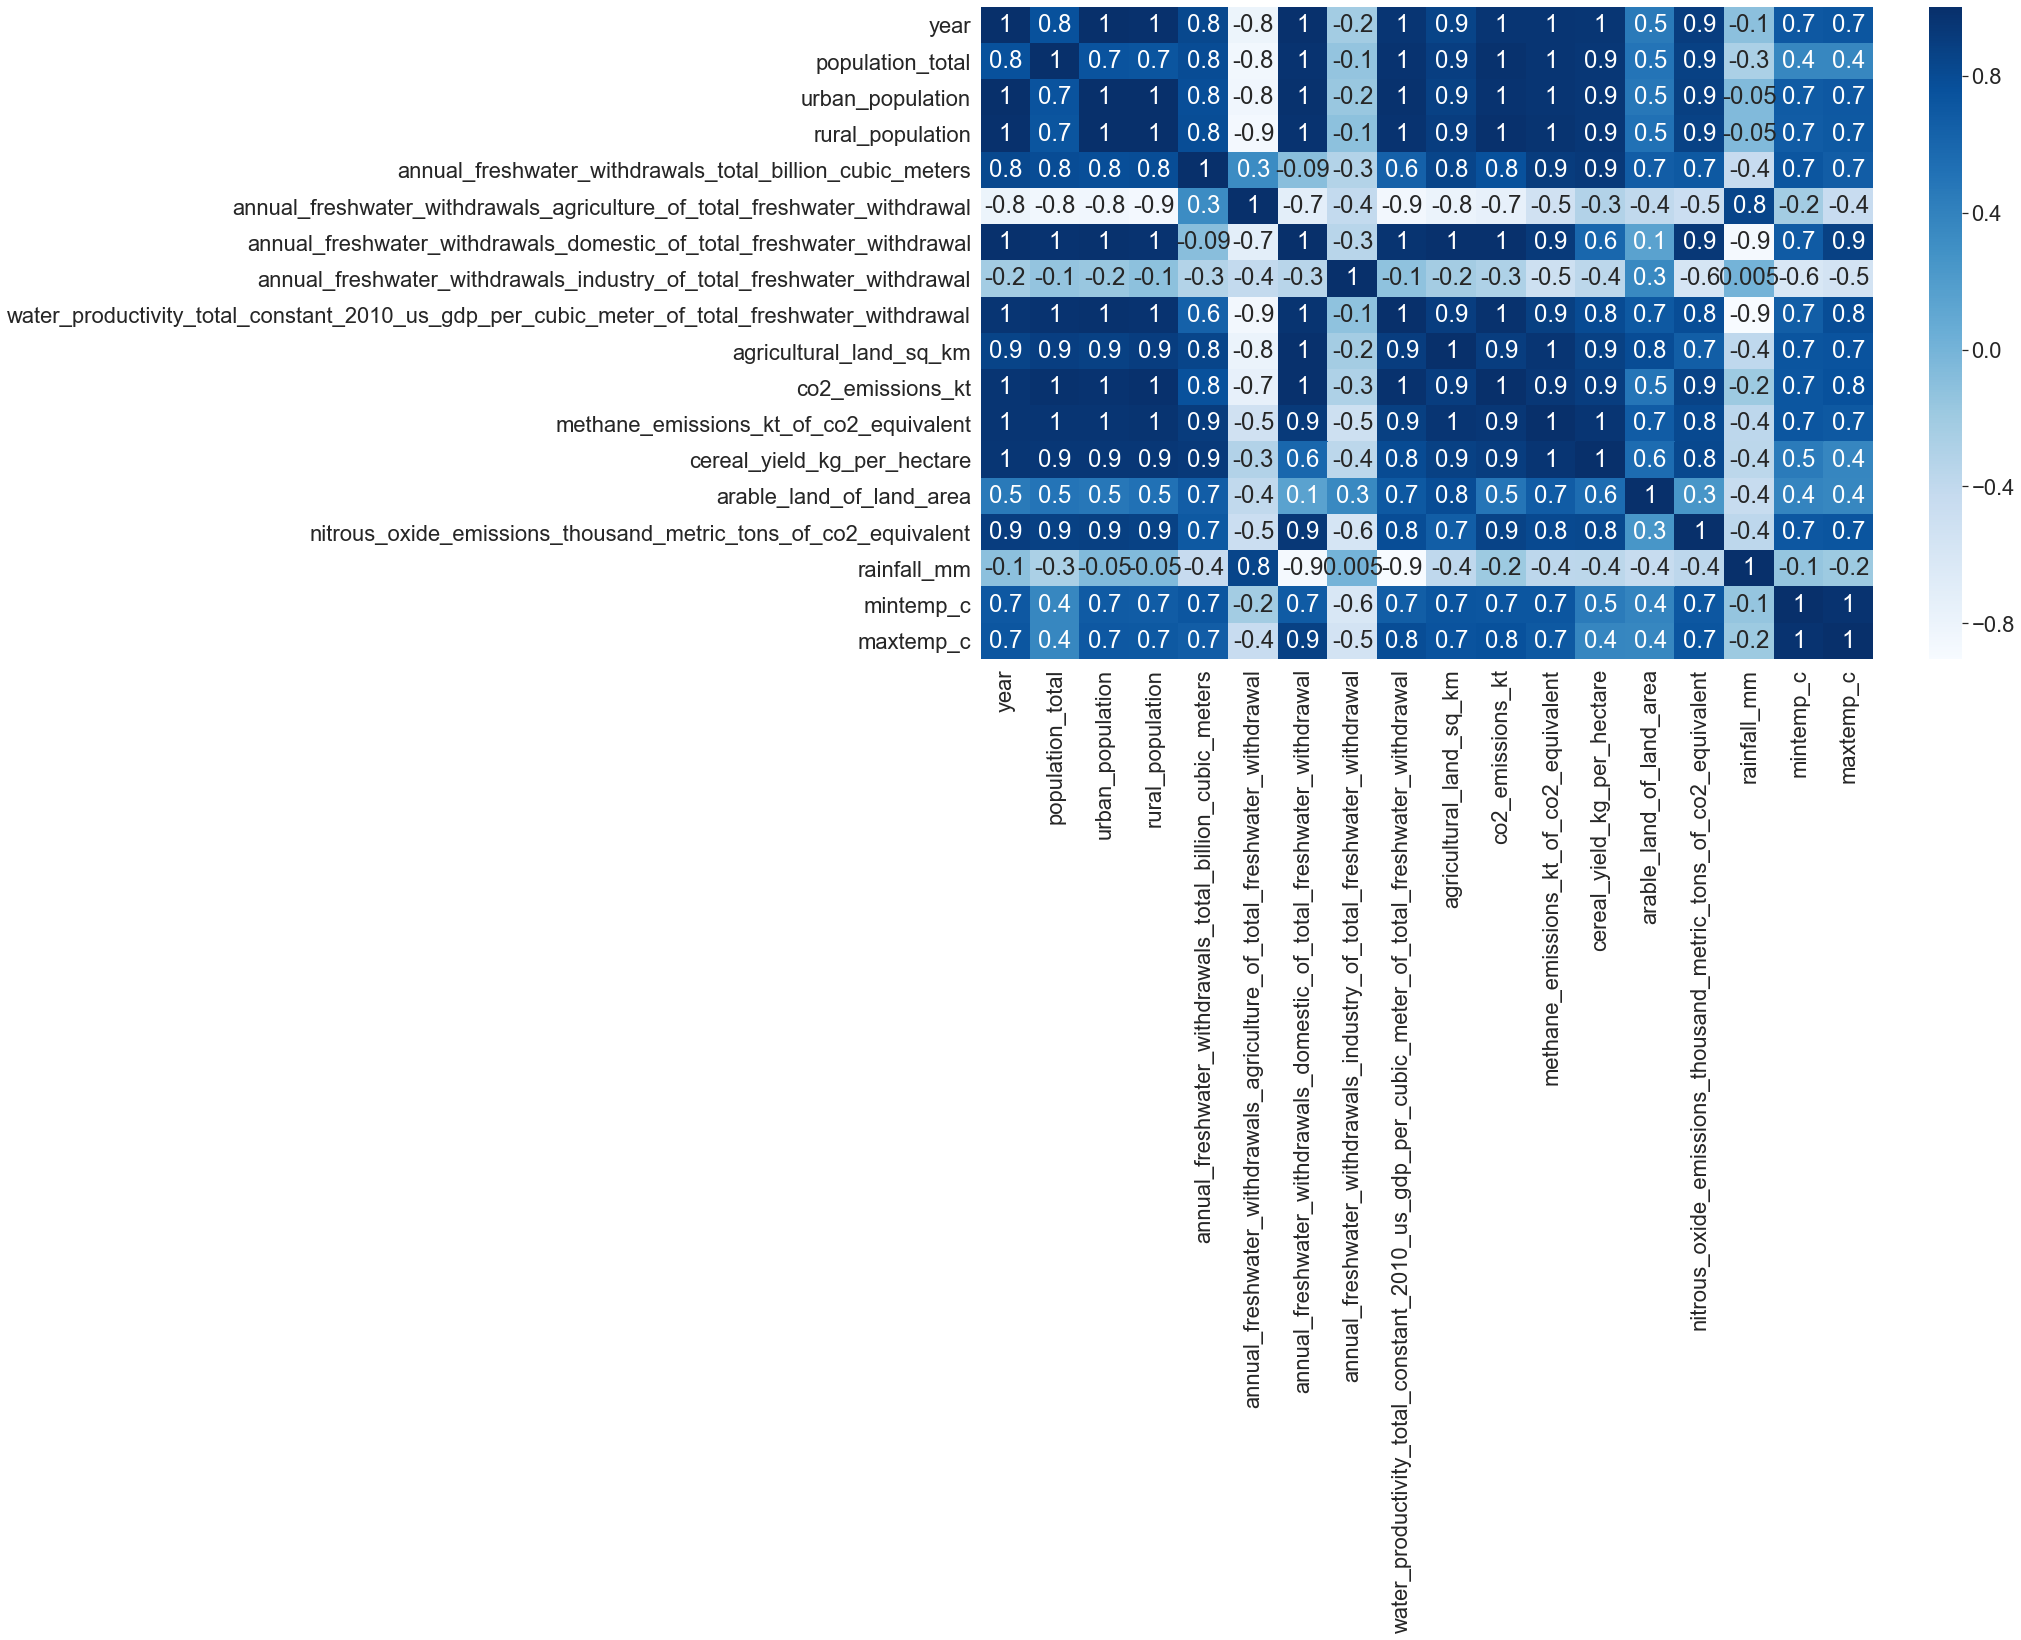

In [553]:
sb.set(font_scale=2)
plt.figure(figsize=(20,12))
ax=plt.subplot(111)
sb.heatmap(merged_data.corr(), cmap="Blues", annot=True,ax=ax,fmt='.1g');

## The correlation figure illustrates the following insights:

* There is a strong negative correlation between annual agricultural freshwater withdrawals and the growth of population over years. This growth decreases the percentage of agriculture withdrawals from total freshwater even though the area of agricultural land is increasing.

* As climate change is an important factor for freshwater withdrawals, we can notice that the growth of population and area of agricultural land increases the amount of co2 and methane, and nitrous and that increases the heat and max temperature.
  And high temperature causes severe crop and livestock damage. and obviously, as the figure above tells us, that decrease the rain average.

In [560]:
merged_data.rename(columns={'water_productivity_total_constant_2010_us_gdp_per_cubic_meter_of_total_freshwater_withdrawal':
                            'water_productivity_total_constant_2010_us_gdp',
                            'annual_freshwater_withdrawals_agriculture_of_total_freshwater_withdrawal':
                            'annual_freshwater_withdrawals_agriculture_of_total',
                            'annual_freshwater_withdrawals_total_billion_cubic_meters':'annual_freshwater_withdrawals_total_m3',
                            'annual_freshwater_withdrawals_industry_of_total_freshwater_withdrawal':
                            'annual_freshwater_withdrawals_industry_of_total',
                            'nitrous_oxide_emissions_thousand_metric_tons_of_co2_equivalent':
                            'nitrous_oxide_emissions',
                            'annual_freshwater_withdrawals_domestic_of_total_freshwater_withdrawal':
                            'annual_freshwater_withdrawals_domestic_of_total',
    
},inplace=True)

In [561]:
merged_data.columns

Index(['year', 'population_total', 'urban_population', 'rural_population',
       'annual_freshwater_withdrawals_total_m3',
       'annual_freshwater_withdrawals_agriculture_of_total',
       'annual_freshwater_withdrawals_domestic_of_total',
       'annual_freshwater_withdrawals_industry_of_total',
       'water_productivity_total_constant_2010_us_gdp',
       'agricultural_land_sq_km', 'co2_emissions_kt',
       'methane_emissions_kt_of_co2_equivalent', 'cereal_yield_kg_per_hectare',
       'arable_land_of_land_area', 'nitrous_oxide_emissions', 'rainfall_mm',
       'mintemp_c', 'maxtemp_c'],
      dtype='object')

In [562]:
merged_data.to_csv('modified_freshwater_withdrawals.csv',index=False)

### here we emphisize the pervious inights about agriculture data.

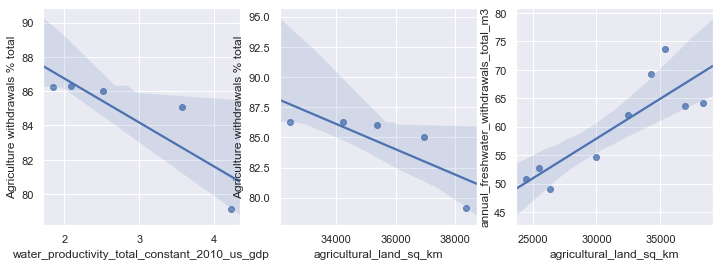

In [575]:
sb.set(font_scale=1)
plt.figure(figsize = [12,4])

# PLOT ON LEFT - SIMPLE SCATTER
plt.subplot(1, 3, 1)
sb.regplot(
    data = merged_data, x = 'water_productivity_total_constant_2010_us_gdp',
    y ='annual_freshwater_withdrawals_agriculture_of_total', truncate=False)
plt.ylabel('Agriculture withdrawals % total')

##########################################
# PLOT ON RIGHT - SCATTER PLOT WITH JITTER
plt.subplot(1, 3, 2)


sb.regplot(data = merged_data, x = 'agricultural_land_sq_km', y ='annual_freshwater_withdrawals_agriculture_of_total'
           , truncate=False, x_jitter=0.3)
plt.ylabel('Agriculture withdrawals % total');
plt.subplot(1, 3, 3)

sb.regplot(data = merged_data, x = 'agricultural_land_sq_km', y ='annual_freshwater_withdrawals_total_m3'
           , truncate=False, x_jitter=0.3);

#### We should have more data points for freshwater withdrawals. 

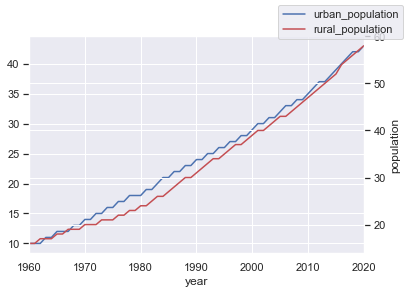

In [576]:
# sb.lineplot(data=merged_data.urban_population, color="g",legend='full',ci='sd')
# ax2 = plt.twinx()
# sb.lineplot(data=merged_data.rural_population, color="b", ax=ax2);
ax = merged_data.plot(x="year", y="urban_population", legend=False)
ax2 = ax.twinx()
merged_data.plot(x="year", y="rural_population", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.ylabel('population')
plt.show()

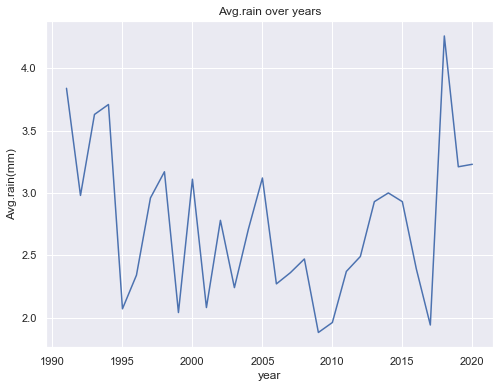

In [577]:
plt.figure(figsize=[8,6])
sb.lineplot(data=merged_data,x='year',y='rainfall_mm')
plt.ylabel('Avg.rain(mm)')
plt.title('Avg.rain over years');